In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
train=pd.read_csv('Train_Sample.csv',sep=';')
test=pd.read_csv('Test_Sample.csv',sep=';')

In [3]:
train_id=train.Id
train_num=train.drop(columns=train.columns[train.dtypes==object]).drop(columns='Id')
y=train.Status
train_num.drop(columns='Status',inplace=True)

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=22)

for train_index, val_index in sss.split(train_num, y):
    print("TRAIN:", train_index, "VAL:", val_index)
    X_train, X_val = train_num.iloc[train_index,:], train_num.iloc[val_index,:]
    y_train, y_val = y[train_index], y[val_index]

TRAIN: [ 4935 25551 61271 ...  9337 12070 29357] VAL: [14537 59552 25318 ... 38813   750 20012]


In [5]:
## divide training set into integer valued, real valued and boolen valued dataframes and objects
X_train_int=X_train[X_train.columns[X_train.dtypes=='int64']]
X_train_float=X_train[X_train.columns[X_train.dtypes==float]]
X_train_bool=X_train[X_train.columns[X_train.dtypes==bool]]
X_train_obj=X_train[X_train.columns[X_train.dtypes==object]]

#### Correlation

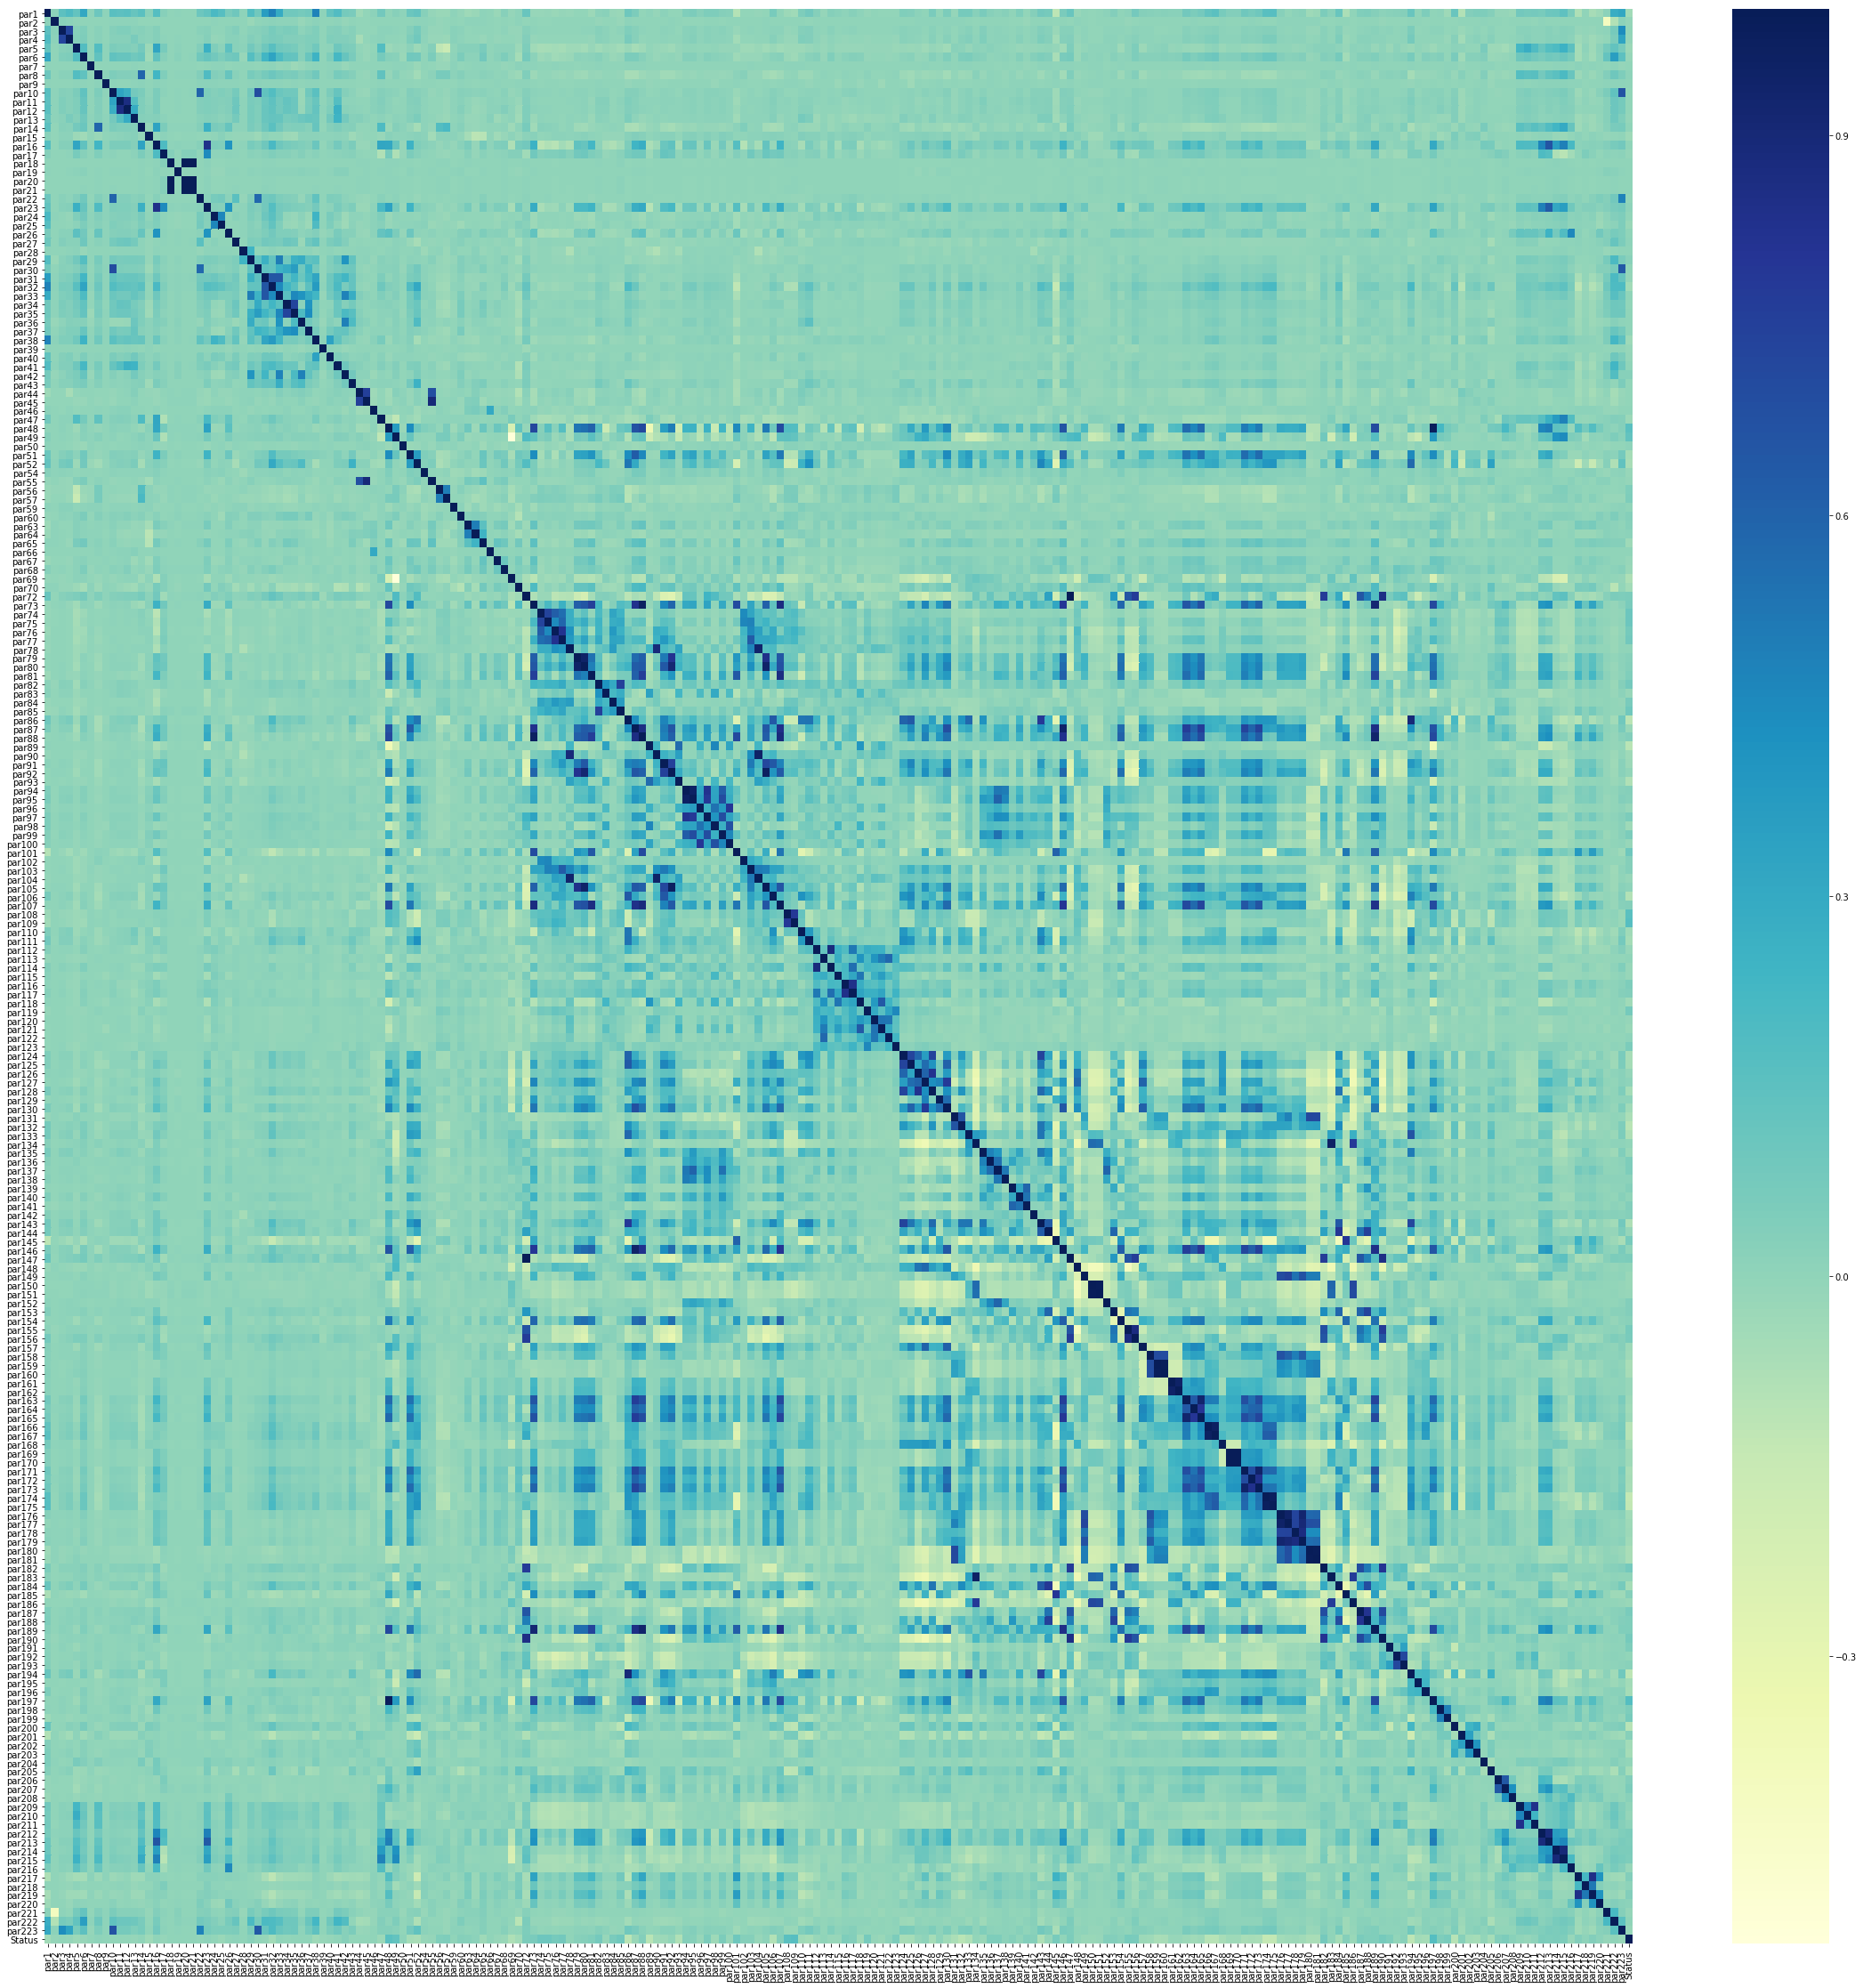

In [6]:
plt.figure(figsize=(40,40))
corr=pd.concat([X_train,y_train],axis=1).corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap="YlGnBu")
plt.savefig('corr.png')

In [19]:
# pd.set_option('display.max_rows', 500)
pd.concat([X_train,y_train],axis=1).corr().iloc[:,-1:].sort_values(by='Status').head(10) 

Status
par174 -0.134240
par175 -0.131400
par194 -0.116936
par86  -0.114048
par132 -0.107839
par89  -0.103674
par166 -0.100275
par200 -0.100080
par167 -0.097777
par106 -0.087302

In [18]:
pd.concat([X_train,y_train],axis=1).corr().iloc[:,-1:].sort_values(by='Status').tail(10)

Status
par85   0.090388
par101  0.095675
par74   0.101227
par75   0.102342
par49   0.133516
par48   0.156626
par108  0.158203
par109  0.165338
par197  0.176225
Status  1.000000

#### continuous

In [8]:
l1=len(X_train_float.columns)

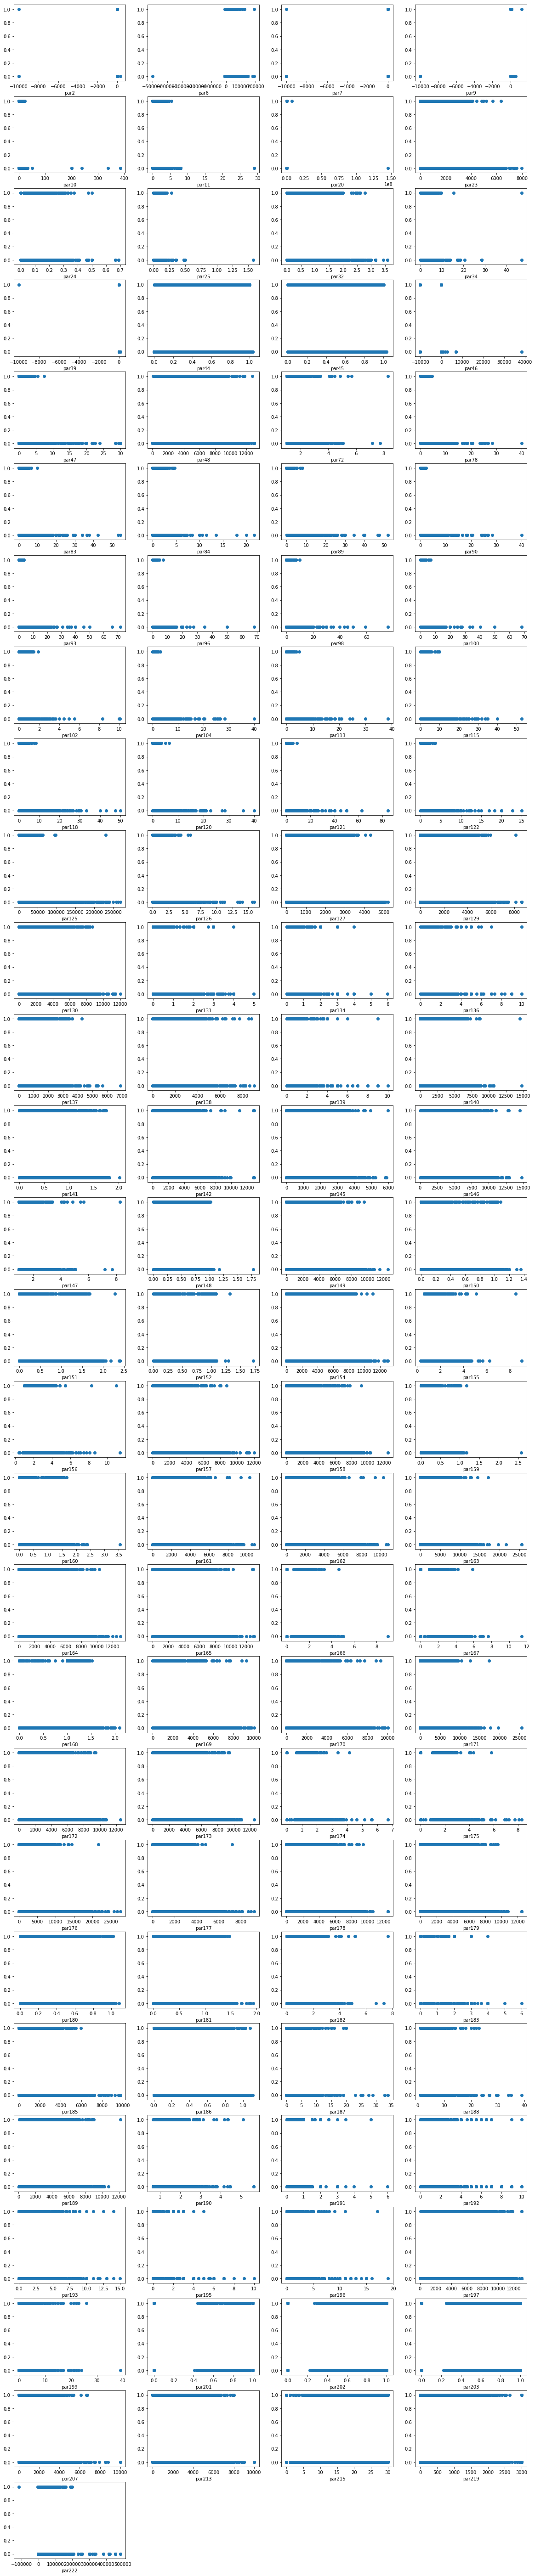

In [9]:
## Scatter plots
plt.figure(figsize=(20,400))

for i, col in enumerate(X_train_float.columns):
    plt.subplot(l1,4,i+1)
    plt.scatter(X_train_float[col],y_train)
    plt.xlabel(col)  

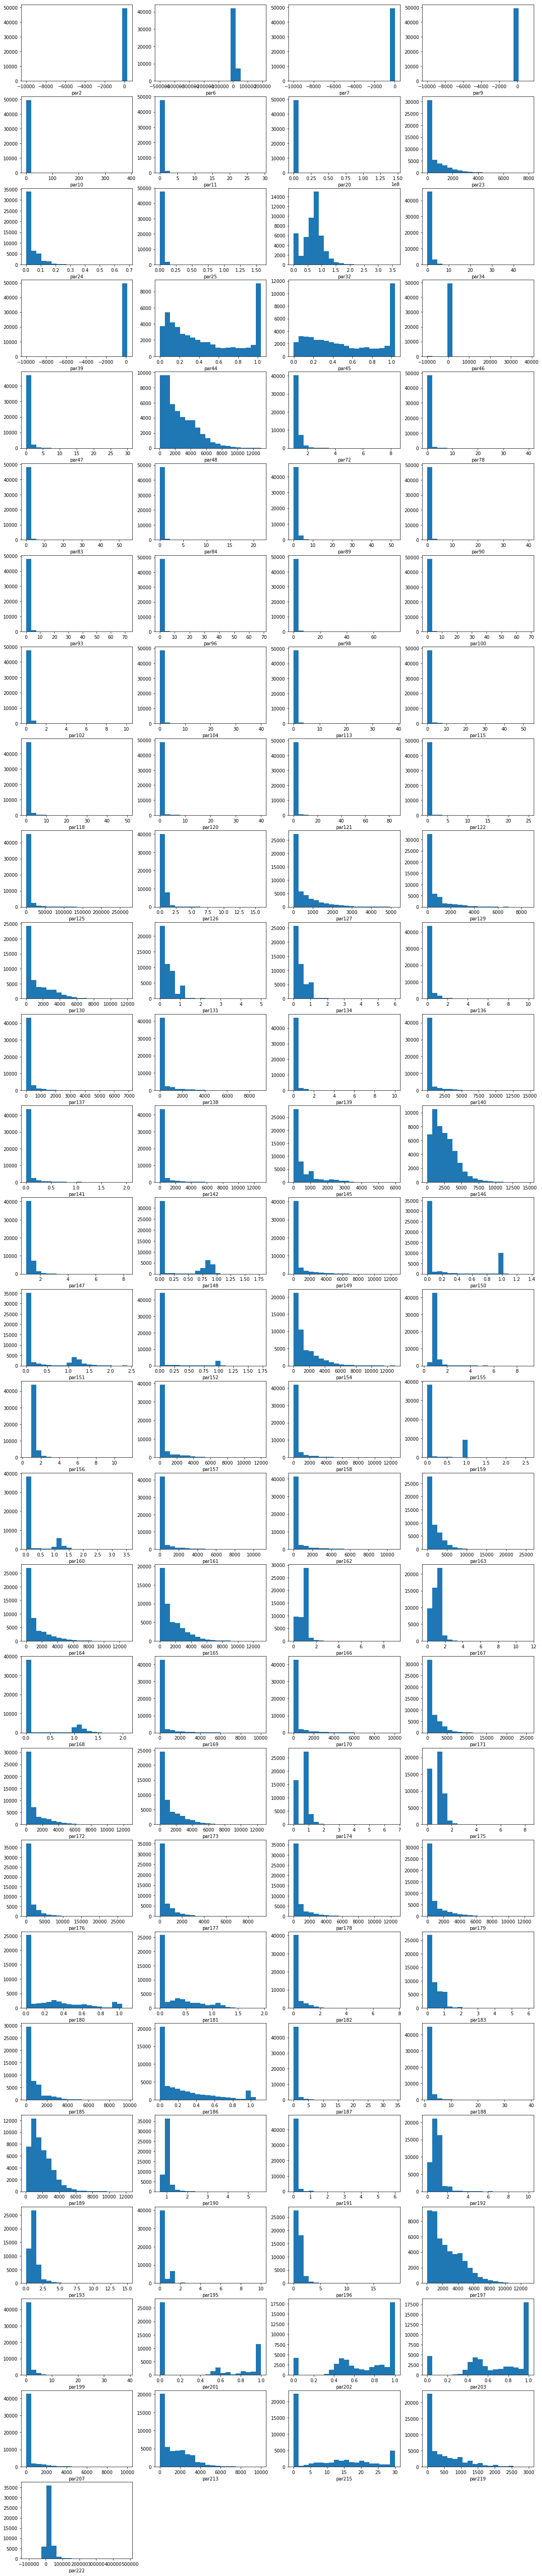

In [10]:
## Histogram
plt.figure(figsize=(20,400))

for i, col in enumerate(X_train_float.columns):
    plt.subplot(l1,4,i+1)
    plt.hist(X_train_float[col],bins=20)
    plt.xlabel(col)

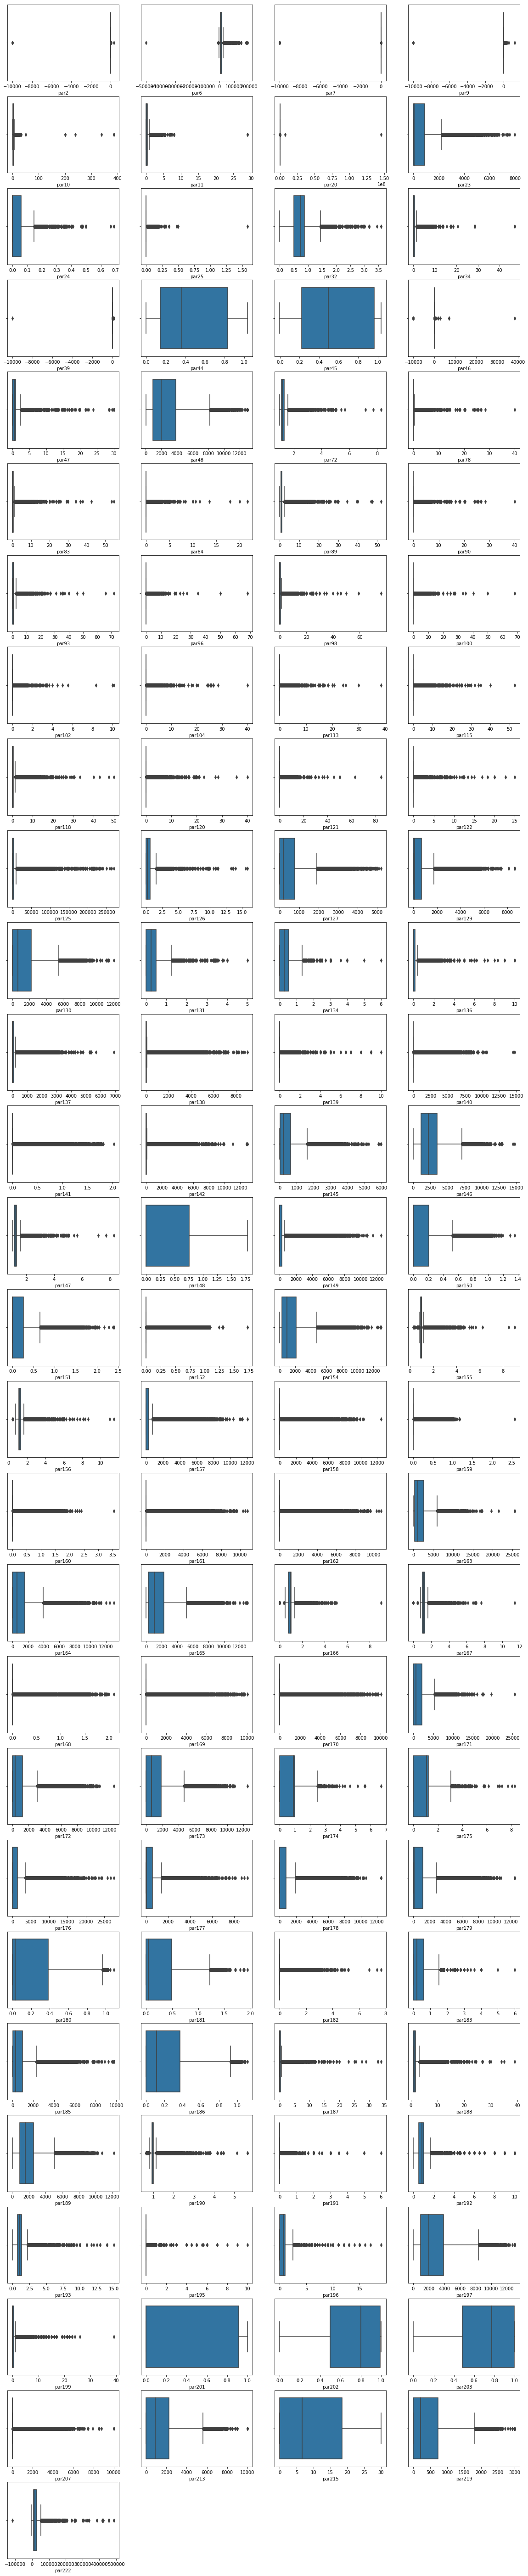

In [11]:
## Boxplots
plt.figure(figsize=(20,400))

for i,col in enumerate(X_train_float.columns):
    plt.subplot(l1,4,i+1)
    sns.boxplot(X_train_float[col])
    plt.xlabel(col)

109it [00:17,  7.30it/s]


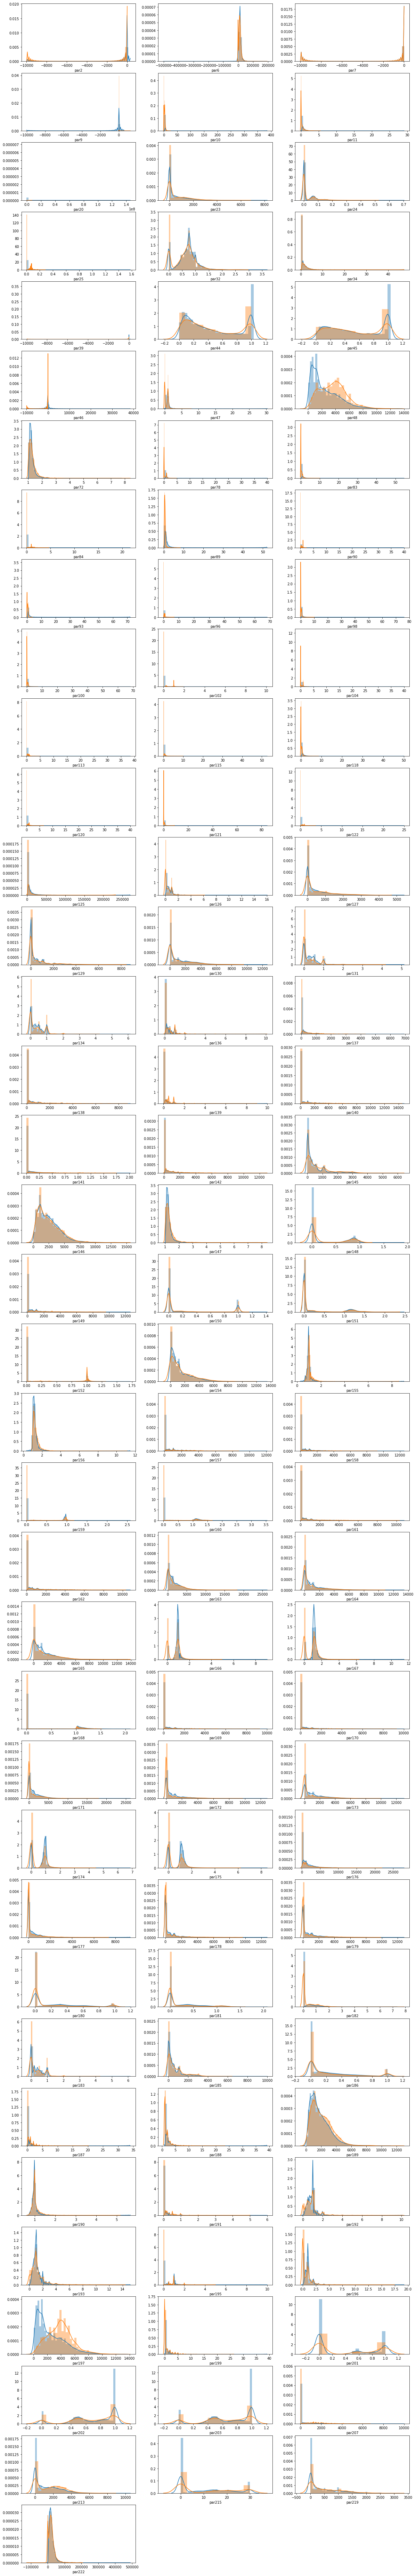

In [28]:
## Distribution of classes
plt.figure( figsize=(20,400) )

for i,col in tqdm(enumerate(X_train_float.columns)):
    plt.subplot(l1,3,i+1)
    sns.distplot(X_train_float[y_train==0][col],label='no default')
    sns.distplot(X_train_float[y_train==1][col],label='default')
    plt.xlabel(col)

In [13]:
pd.set_option('display.max_rows', 700)
X_train.par2.value_counts()


 0.000000        20767
 0.090909         1149
 0.083333          958
 0.100000          857
 0.333333          797
 0.076923          794
 0.250000          691
 0.200000          679
 0.500000          663
 0.166667          617
 0.153846          607
 0.181818          586
 0.111111          568
 0.071429          542
 0.142857          526
 1.000000          494
 0.272727          463
 0.125000          401
 0.300000          397
 0.066667          388
 0.363636          360
 0.222222          348
 0.400000          342
 0.214286          335
 0.285714          325
 0.307692          318
 0.666667          299
 0.062500          293
 0.230769          288
 0.133333          286
 0.454545          270
 0.357143          223
 0.266667          208
 0.384615          203
 0.058824          202
 0.600000          200
 0.750000          191
 0.055556          189
 0.800000          183
 0.545455          182
 0.636364          180
 0.428571          177
 0.416667          171
 0.176471  

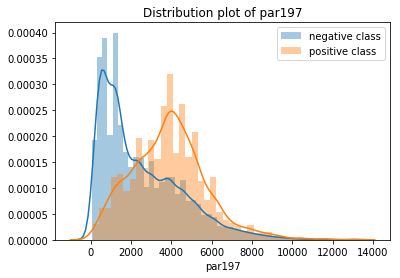

In [32]:
sns.distplot(X_train_float[y_train==0]['par197'],label='negative class')
sns.distplot(X_train_float[y_train==1]['par197'],label='positive class')
plt.title('Distribution plot of par197')
plt.legend()
plt.savefig('par197')

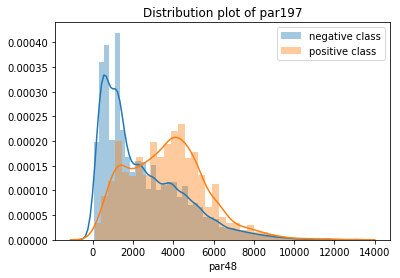

In [33]:
sns.distplot(X_train_float[y_train==0]['par48'],label='negative class')
sns.distplot(X_train_float[y_train==1]['par48'],label='positive class')
plt.title('Distribution plot of par197')
plt.legend()
plt.savefig('par48')

In [15]:
pd.set_option('display.max_rows',21000)
pd.concat([X_train,y_train],axis=1).groupby('par48').Status.value_counts()

par48     Status
50.01     0           1
50.03     0           8
50.10     0           1
90.00     0           5
90.82     0           1
91.66     0           1
91.90     0           1
91.96     0           1
92.00     0           1
92.20     0           1
92.70     0           1
92.92     0           2
93.32     0           1
93.40     0           2
93.50     1           1
93.60     0           1
93.74     0           1
94.15     0           1
94.20     0           1
94.25     0           1
94.50     0           1
94.74     0           1
94.90     0           1
94.98     0           2
94.99     0           1
95.61     0           1
95.67     0           1
96.30     0           1
96.80     0           1
96.88     0           1
97.47     0           2
97.65     0           3
98.00     0           1
98.30     0           1
98.41     0           1
98.50     0           1
98.64     0           1
98.74     0           1
98.82     0           2
99.00     0           1
99.04     0           1

#### int

In [16]:
l2=len(X_train_int.columns)

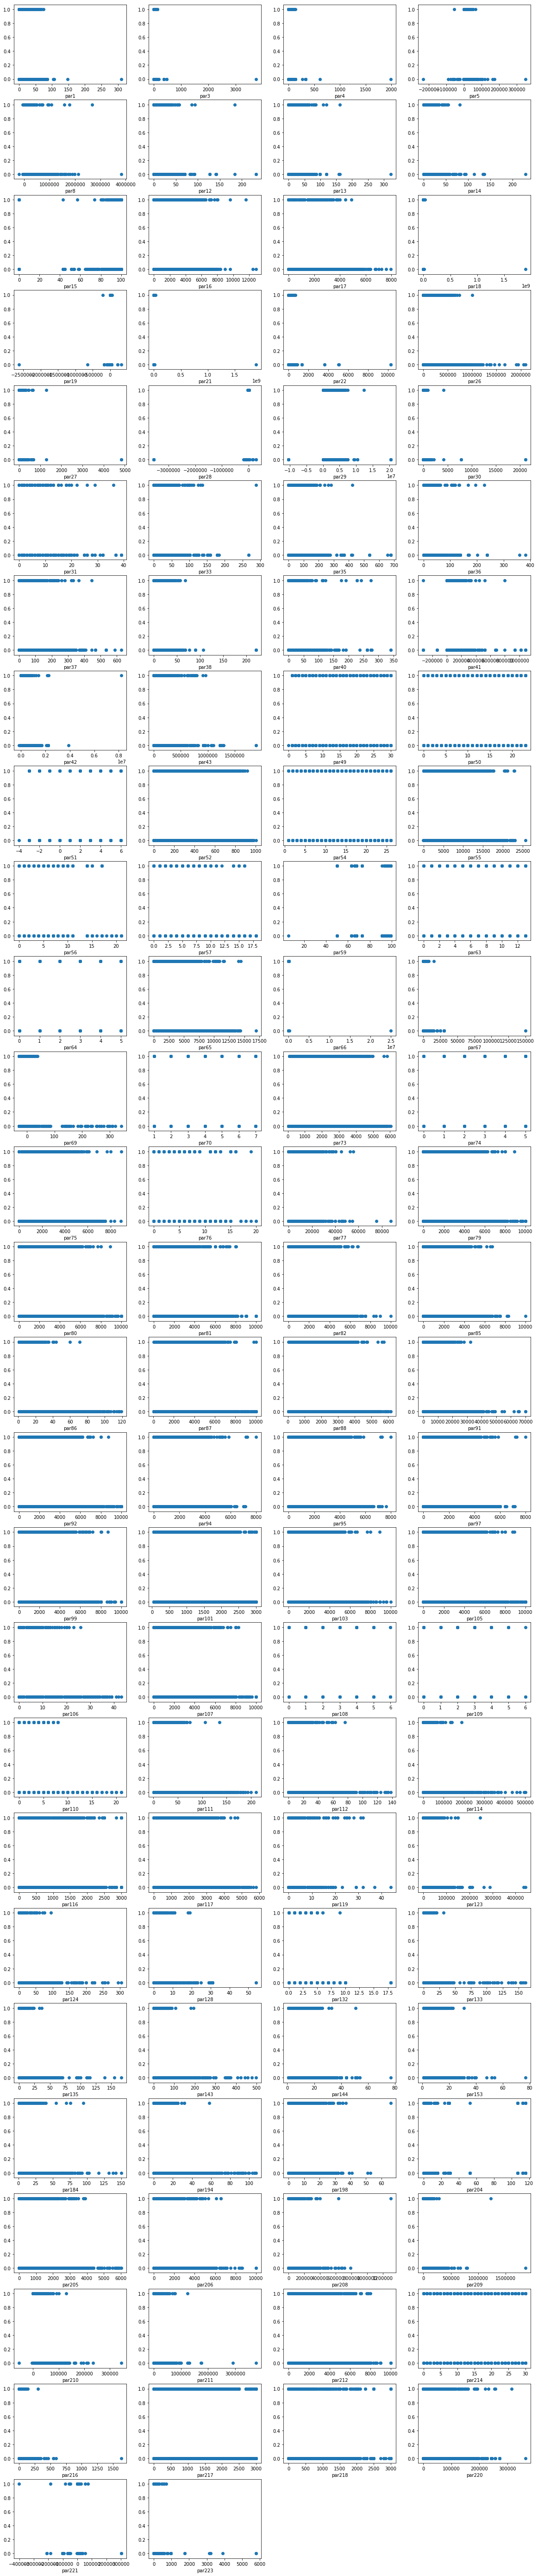

In [20]:
## Scatter plots
plt.figure(figsize=(20,400))

for i, col in enumerate(X_train_int.columns):
    plt.subplot(l2,4,i+1)
    plt.scatter(X_train_int[col],y_train)
    plt.xlabel(col)  

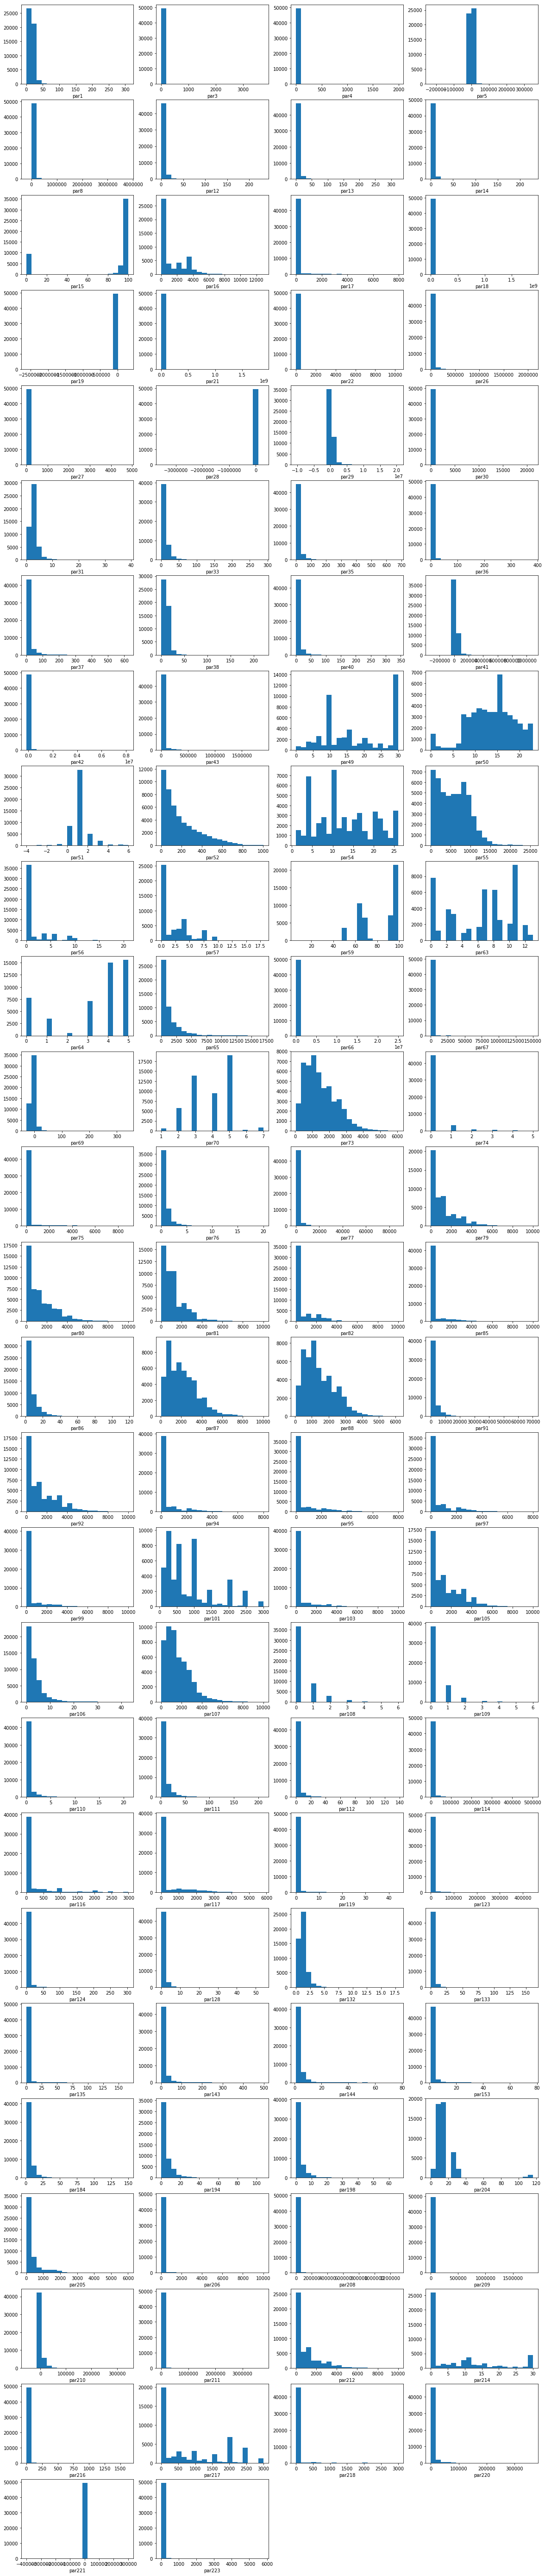

In [21]:
## Histogram
plt.figure(figsize=(20,400))

for i, col in enumerate(X_train_int.columns):
    plt.subplot(l2,4,i+1)
    plt.hist(X_train_int[col],bins=20)
    plt.xlabel(col)

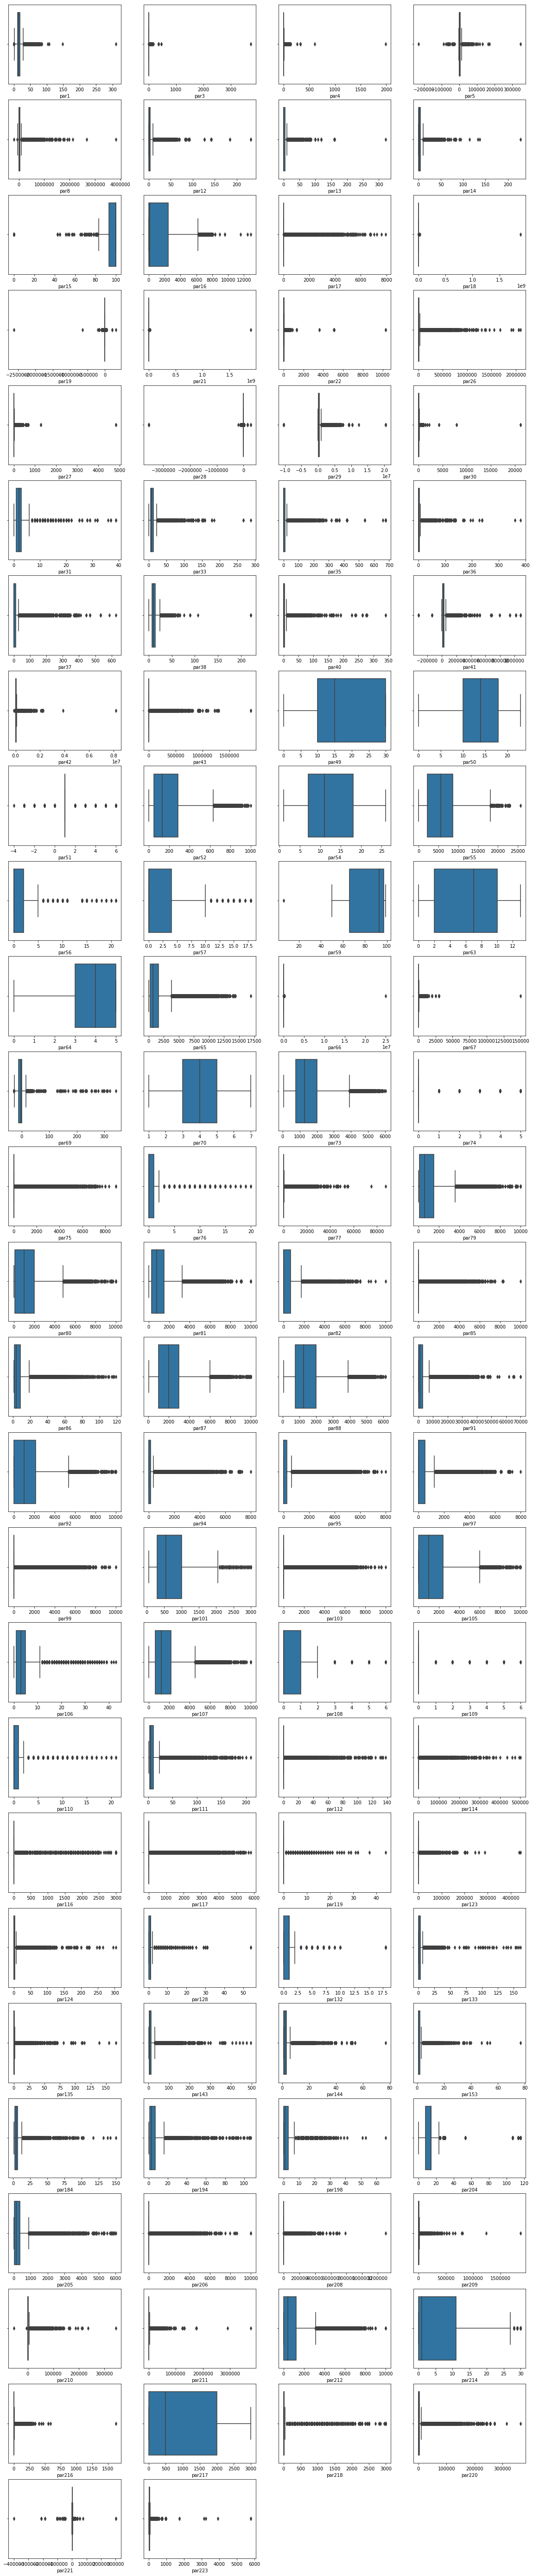

In [22]:
## Boxplots
plt.figure(figsize=(20,400))

for i,col in enumerate(X_train_int.columns):
    plt.subplot(l2,4,i+1)
    sns.boxplot(X_train_int[col])
    plt.xlabel(col)

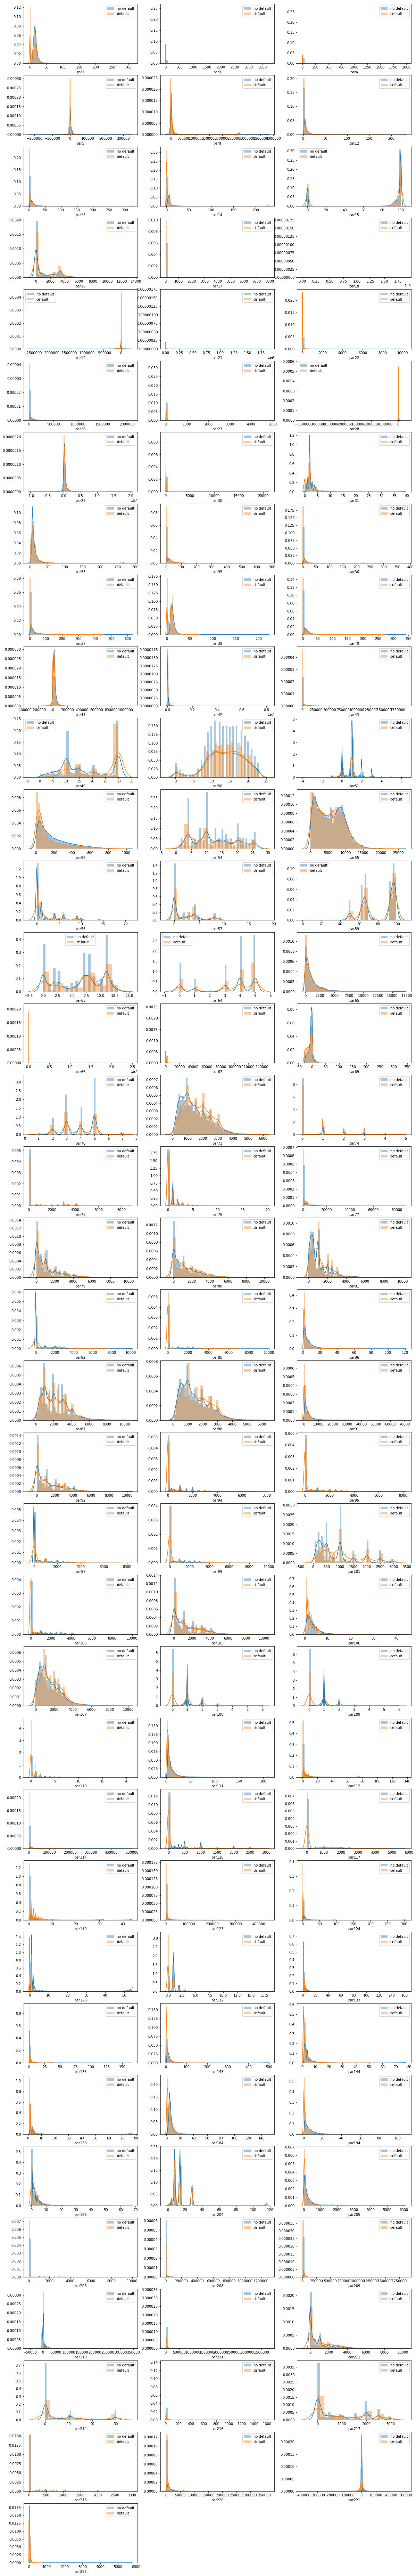

In [23]:
## Distribution of classes
plt.figure( figsize=(20,400) )

for i,col in enumerate(X_train_int.columns):
    plt.subplot(l2,3,i+1)
    sns.distplot(X_train_int[y_train==0][col],label='no default')
    sns.distplot(X_train_int[y_train==1][col],label='default')
    plt.xlabel(col)
    plt.legend()

In [24]:
pd.concat([X_train,y_train],axis=1).groupby('par49').Status.value_counts()

par49  Status
0      0             1
1      0           696
       1             9
2      0           547
       1             7
3      0           797
       1            12
4      0           704
       1             7
5      0          1392
       1            26
6      0           814
       1            15
7      0          1695
       1            60
8      0           831
       1            15
9      0           600
       1            14
10     0          9167
       1           462
11     0           915
       1            26
12     0          1193
       1            50
13     0           924
       1            35
14     0          2180
       1           179
15     0          2624
       1           222
16     0           903
       1            59
17     0           767
       1            46
18     0           643
       1            43
19     0           447
       1            43
20     0          2050
       1           208
21     0           655
       1            

#### bool

In [25]:
X_train_bool=X_train_bool.astype(int)

In [26]:
for i, col in enumerate(X_train_bool.columns):
    print(pd.concat([X_train_bool,y_train],axis=1).groupby(col).Status.value_counts()/X_train.shape[0] )


par60  Status
0      0         0.206205
       1         0.012409
1      0         0.722716
       1         0.058670
Name: Status, dtype: float64
par68  Status
0      0         0.398141
       1         0.033327
1      0         0.530780
       1         0.037753
Name: Status, dtype: float64
par200  Status
0       0         0.178274
        1         0.024778
1       0         0.750647
        1         0.046302
Name: Status, dtype: float64


Id  par1      par2  par3  par4   par5          par6      par7   par8  \
0   1    12  1.375000    11     0  18006  26700.750000  1.500000  37459   
1   2     9  1.000000    14     3      3   5903.166667  0.833333  18831   
2   3    17  0.029412     1    44   5747  10919.500000  0.500000  37616   
3   4     9  0.333333     3     0   7316  14773.666670  1.000000  24001   
4   5    12  0.000000     0     0   6264  19271.500000  1.000000  58917   

       par9  ...  par214     par215  par216  par217  par218       par219  \
0  5.000000  ...      10  20.000000       2       0       0     0.000000   
1  1.833333  ...       3   4.500000       2    1000       5   391.625000   
2  2.250000  ...      20  27.666667       6       0       0     0.000000   
3  4.500000  ...      21  24.833333      24    1200      30  1003.333333   
4  2.800000  ...      15  15.000000       1    2000      11  1308.500000   

   par220  par221       par222  par223  
0       0    3419  18479.25000      58  
1    3133    2396  12262.78571      51  
2       0      77  16017.88571      68  
3    9030    1685  44265.36364      24  
4   15702    2373  22425.25000      27  

[5 rows x 222 columns]